In [36]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения

    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """

    grid = np.linspace(xmin, xmax, grid_size)
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()


In [38]:
res = np.random.uniform(0, 5, 1000000)

# посмотрим на первые десять значений
res[:10]

array([2.20569829, 3.06911148, 2.56749234, 1.65517293, 3.33283024,
       3.42347289, 1.02034621, 1.96660453, 0.19562997, 2.12574067])

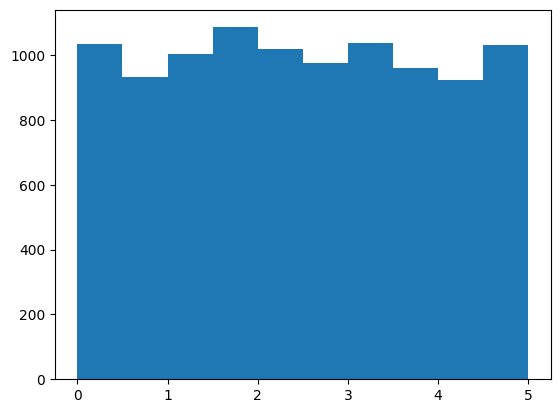

In [39]:
plt.hist(res[:10000])
plt.show()

In [40]:
import random
# Метод обратных функций
def random_values_generator(left, right, attmp):
    res = []
    for i in range(1, attmp):
        value = (right - left) * random.random() + left
        res.append(value)
    return res

Введите границу слева: 2
Введите границу справа: 5


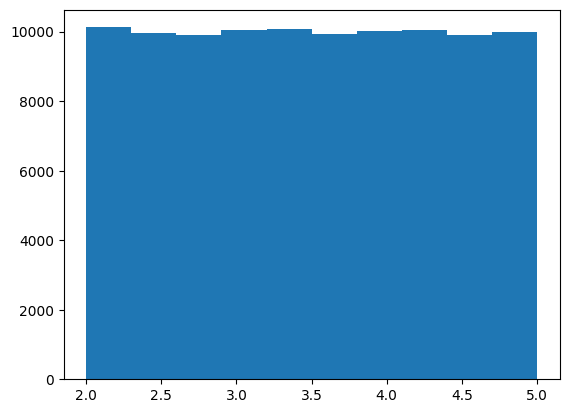

In [60]:
left = int(input("Введите границу слева: "))
right = int(input("Введите границу справа: "))
# Количество попыток
attmp = 100000

res = random_values_generator(left, right, attmp)
plt.hist(res)
plt.show()

In [61]:
show_pdf(
    pdf=sps.uniform.pdf, xmin=left - 5, xmax=right + 5, ymax=1, grid_size=10000,
    distr_name=r'$U(' left, ',', right, ',)$', loc=left, scale=right
)

SyntaxError: invalid syntax (3252749859.py, line 3)

In [43]:
M = (left + right) / 2 # мат ожидание


In [44]:
D = (right - left) * (right - left) / 12 # дисперсия


In [45]:
import math
SC = (right - left) / (2 * math.sqrt(3))
print(M, D, SC)

3.5 0.75 0.8660254037844387


In [46]:
m = 0.0 #точечная оценка матожидания
d = 0.0 # точечная оценка дисперсии
sc = 0
for i in res:
    m = m + i
m = m / attmp

for i in res:
    d = d + math.pow((i - m), 2)
d = d / attmp

sc = math.sqrt(d)

print(m, d, sc)


3.498870023609971 0.7454667804833984 0.8634041814141268


In [47]:
# точеные оценки left, right
a1 = m - math.sqrt(3)*sc
a2 = m + math.sqrt(3)*sc
print(a1, a2)


2.0034101139332874 4.994329933286655


In [48]:
# доверительный интервал right
mx=res[0]
for i in res:
    if i > mx:
        mx = i

y = 0.90
e1 = (1 - y) / 2
e2 = e1

print('%s, %s'%(mx / (math.pow((1 - e2),1 / attmp)), mx / (math.pow(e1, 1/attmp)  ) ))

4.999835214688937, 4.999982433953272


In [49]:
a = 0.95 #уровень значимости
k = 9 # кол-во степеней свободы
#найдем предполагаемую плотность
f = 1 / (a2 - a1)
print(f)

0.33434530525669476


In [50]:
from scipy import stats
def chiSquareValue(self, alpha, freedom):
    return stats.chi2.ppf(alpha, freedom)

In [51]:
print(stats.chi2.ppf(0.95, attmp - 3))

100733.72514319631


In [52]:
res.sort()

In [53]:
# проверка гипотезы (нахождение хи-квадрат эмпирического и теор)
xhi = 0
sm = 0
for i, val in enumerate(res):
    if i + 1 >= len(res):
        break
    n_i = attmp * f * (res[i + 1] - res[i])
    sm += n_i
    xhi = xhi + (n_i - round(n_i)) * (n_i - round(n_i)) / n_i
print(xhi, sm/attmp)
# Если эмпирический меньше теоритического, то теория подтверждается
print(xhi < stats.chi2.ppf(0.95, attmp - 3))

14399.136485724157 1.0029605795294598
True


Введите параметр n биномиального распределения: 20
Введите параметр p биномиального распределения: 0.4
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


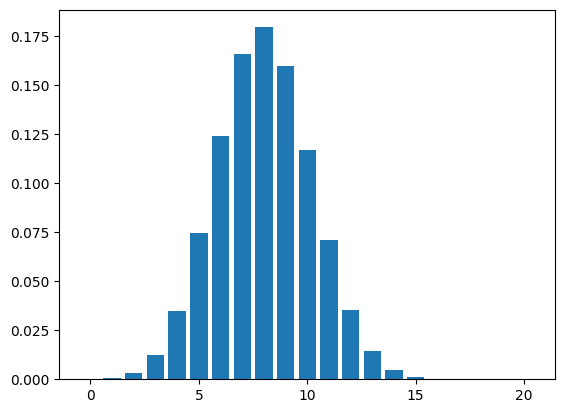

In [54]:
#Задание №2
n = int(input("Введите параметр n биномиального распределения: "))
p = float(input("Введите параметр p биномиального распределения: "))
def factorial(n):
    x = 1
    for i in range(1, n+1):
        x *= i
    return x

def combination(n, k):
    return factorial(n)/(factorial(k)*factorial(n-k))

def binompmf(k,n,p):
    return combination(n,k)*(p**k)*((1-p)**(n-k))

r = list(range(n + 1))
dist = [binompmf(k, n, p) for k in r]
import matplotlib.pyplot as plt

print(r)
plt.bar(r, dist)
plt.show()

Введите n для биномиального распредления: 10
Введите вероятность успеха для каждого испытания: 0.3
[3, 3, 2, 6, 3, 5, 3, 4, 2, 1, 4, 4, 3, 3, 5, 2, 1, 0, 3, 2, 4, 2, 3, 3, 3, 3, 6, 1, 4, 4, 2, 2, 4, 4, 1, 4, 4, 2, 3, 6, 4, 7, 5, 3, 2, 4, 4, 3, 4, 3, 2, 4, 3, 3, 3, 4, 6, 6, 3, 1, 7, 2, 1, 4, 6, 3, 4, 2, 3, 4, 2, 2, 0, 4, 3, 4, 2, 3, 1, 3, 2, 3, 3, 3, 5, 3, 3, 3, 1, 4, 2, 5, 2, 2, 6, 3, 3, 2, 1, 5, 4, 4, 5, 1, 2, 2, 1, 1, 7, 3, 0, 3, 1, 3, 4, 3, 1, 3, 4, 3, 3, 3, 3, 2, 3, 5, 4, 3, 3, 3, 0, 3, 4, 1, 2, 4, 5, 3, 0, 3, 1, 4, 6, 5, 3, 0, 5, 3, 4, 3, 4, 3, 1, 6, 4, 5, 4, 6, 2, 3, 3, 1, 2, 5, 5, 0, 2, 3, 7, 4, 6, 3, 3, 1, 6, 4, 2, 5, 4, 0, 1, 5, 1, 3, 3, 0, 4, 1, 4, 3, 1, 3, 4, 3, 1, 5, 6, 2, 2, 5, 1, 4, 1, 2, 3, 4, 6, 1, 4, 3, 4, 1, 1, 3, 2, 3, 2, 3, 3, 2, 2, 1, 0, 3, 2, 3, 3, 3, 4, 6, 1, 4, 4, 3, 2, 1, 2, 5, 4, 2, 1, 4, 3, 4, 2, 3, 4, 6, 2, 1, 2, 3, 2, 5, 3, 3, 1, 5, 4, 4, 3, 3, 2, 4, 4, 5, 2, 3, 4, 2, 3, 1, 3, 6, 3, 4, 4, 5, 5, 4, 2, 1, 2, 3, 4, 2, 1, 3, 7, 3, 3, 3, 3, 4, 4, 4, 5, 3, 1, 2, 

c:\ptuir\7 semestr\mmod\sheesh\venv\lib\site-packages\ipykernel_launcher.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0, 0.5, 'Frequency')

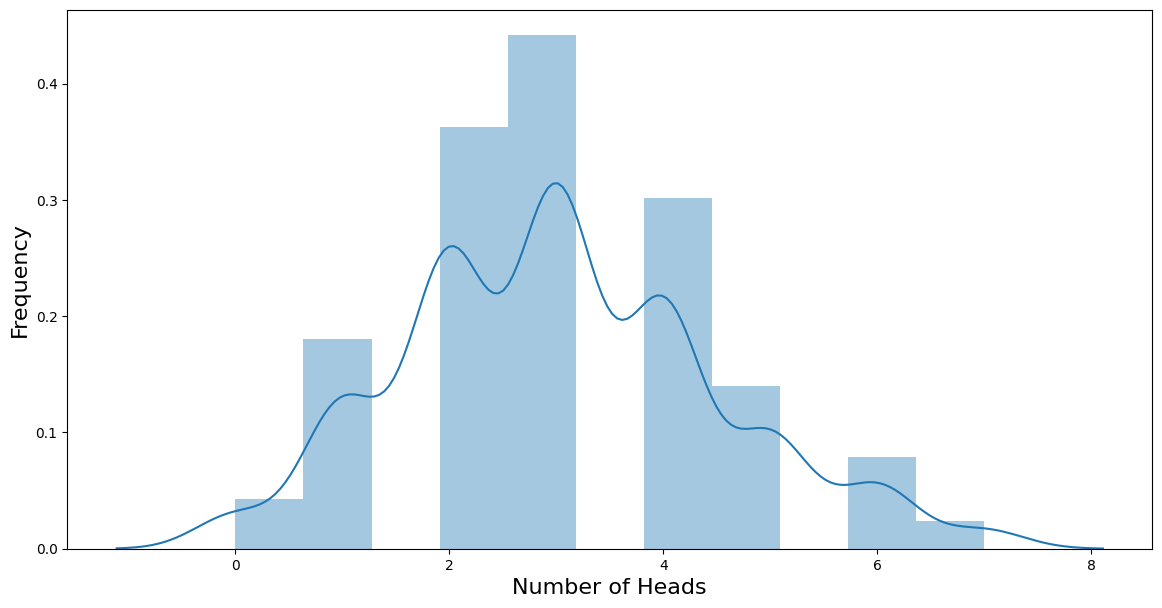

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Input variables
# Number of trials
trials = 1000
# Number of independent experiments in each trial
n = int(input("Введите n для биномиального распредления: "))
# Probability of success for each experiment the more p than graphic shifts righter
p = float(input("Введите вероятность успеха для каждого испытания: "))
# Function that runs our coin toss trials
# heads is a list of the number of successes from each trial of n experiments
def run_binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i<=p]))
        # print(tosses)
    return heads
# Run the function
heads = run_binom(trials, n, p)
# Plot the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
print(heads)
ax = sns.distplot(heads, bins=11, label='simulation results')
ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)


In [56]:
# Дисперсия и мат ожидание (теоретические)
D_binom = n*p*(1-p)
M_binom = n*p
print(M_binom, D_binom)

3.0 2.0999999999999996


In [57]:
# точечные оценки
m_binom = 0
d_binom = 0
for i in range(0, len(heads)):
    m_binom += heads[i]
m_binom /= trials

for i in range(0, len(heads)):
    d_binom += math.pow((heads[i] - m_binom), 2)
d_binom /= (trials - 1)

print(m_binom, d_binom)

def count_happened(A):
    m = 0
    for i in range(0, len(heads)):
        if heads[i] == A: m += 1
    return m

#интервальная оценка параметра A
A = 6

p = 0.95
t = 1.96

W = count_happened(A) / trials

delta = t * math.pow(((W * (1 - W)) / trials), 1/2)

print(f'Доверительный интервал для A = {A}, p = {p} :')
print('(', W - delta, ', ', W + delta, ')')
print(W)

3.038 2.1727287287287234
Доверительный интервал для A = 6, p = 0.95 :
( 0.036491632222951584 ,  0.06350836777704842 )
0.05


In [58]:
prob = float(input("Введите вероятность успеха для каждого испытания:"))

xhi = 0
for i in range(0, n):
    n_i = count_happened(i) / trials
    if n_i != 0:
        xhi = xhi + (n_i - binompmf(i,n,prob)) * (n_i - binompmf(i,n,prob)) / n_i
print(xhi)
print(xhi < stats.chi2.ppf(0.95, n - 3))

Введите вероятность успеха для каждого испытания:0.2
0.6416907814853232
True
